<a href="https://colab.research.google.com/github/SagnikChunder/Airline-Ticket-Sales-Prediction-using-Time-Series-Forecasting/blob/main/Airline_Ticket_Sales_Prediction_using_Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving US Airline Flight Routes and Fares 1993-2024.csv to US Airline Flight Routes and Fares 1993-2024 (1).csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('US Airline Flight Routes and Fares 1993-2024.csv')
df.head()

,tbl,Year,quarter,citymarketid_1,citymarketid_2,city1,city2,airportid_1,airportid_2,airport_1,...,fare,carrier_lg,large_ms,fare_lg,carrier_low,lf_ms,fare_low,Geocoded_City1,Geocoded_City2,tbl1apk
0,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,14112,ABE,...,81.43,G4,1.0000,81.43,G4,1.0000,81.43,NaN,NaN,202131013514112ABEPIE
1,Table1a,2021,3,30135,33195,"Allentown/Bethlehem/Easton, PA","Tampa, FL (Metropolitan Area)",10135,15304,ABE,...,208.93,DL,0.4659,219.98,UA,0.1193,154.11,NaN,NaN,202131013515304ABETPA
2,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11259,ABQ,...,184.56,WN,0.9968,184.44,WN,0.9968,184.44,NaN,NaN,202131014011259ABQDAL
3,Table1a,2021,3,30140,30194,"Albuquerque, NM","Dallas/Fort Worth, TX",10140,11298,ABQ,...,182.64,AA,0.9774,183.09,AA,0.9774,183.09,NaN,NaN,202131014011298ABQDFW
4,Table1a,2021,3,30140,30466,"Albuquerque, NM","Phoenix, AZ",10140,14107,ABQ,...,177.11,WN,0.6061,184.49,AA,0.3939,165.77,NaN,NaN,202131014014107ABQPHX


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245955 entries, 0 to 245954
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tbl             245955 non-null  object 
 1   Year            245955 non-null  int64  
 2   quarter         245955 non-null  int64  
 3   citymarketid_1  245955 non-null  int64  
 4   citymarketid_2  245955 non-null  int64  
 5   city1           245955 non-null  object 
 6   city2           245955 non-null  object 
 7   airportid_1     245955 non-null  int64  
 8   airportid_2     245955 non-null  int64  
 9   airport_1       245955 non-null  object 
 10  airport_2       245955 non-null  object 
 11  nsmiles         245955 non-null  int64  
 12  passengers      245955 non-null  int64  
 13  fare            245955 non-null  float64
 14  carrier_lg      244415 non-null  object 
 15  large_ms        244415 non-null  float64
 16  fare_lg         244415 non-null  float64
 17  carrier_lo

,Year,quarter,citymarketid_1,citymarketid_2,airportid_1,airportid_2,nsmiles,passengers,fare,large_ms,fare_lg,lf_ms,fare_low
count,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,245955.000000,244415.000000,244415.000000,244343.000000,244343.000000
mean,2008.524124,2.479153,31556.430201,32180.117086,12437.099986,13249.889525,1189.812319,299.476795,218.979587,0.665252,218.710963,0.450438,190.675939
std,8.703364,1.122149,1089.872880,1232.464184,1431.665257,1425.810159,703.143472,511.389486,82.372486,0.224635,84.674363,0.332669,73.577694
min,1993.000000,1.000000,30135.000000,30189.000000,10135.000000,10466.000000,109.000000,0.000000,50.000000,0.003800,50.000000,0.010000,50.000000
25%,2001.000000,1.000000,30721.000000,30994.000000,11193.000000,12197.000000,626.000000,21.000000,164.620000,0.480000,161.500000,0.158000,140.060000
50%,2008.000000,2.000000,31423.000000,32211.000000,12266.000000,13303.000000,1023.000000,113.000000,209.320000,0.652400,208.030000,0.360000,181.630000
75%,2016.000000,3.000000,32467.000000,33192.000000,13487.000000,14679.000000,1736.000000,339.000000,262.890000,0.871900,263.640000,0.750000,230.040000
max,2024.000000,4.000000,35412.000000,35628.000000,16440.000000,15919.000000,2724.000000,8301.000000,3377.000000,1.000000,2725.600000,1.000000,2725.600000


In [ ]:
# Clean Quarter values (e.g., ensure they are strings like 'Q1', 'Q2', etc.)
df['quarter'] = df['quarter'].astype(str).str.upper().str.strip()

# Fix common formats like '1' to 'Q1'
df['quarter'] = df['quarter'].apply(lambda x: f"Q{x}" if not x.startswith('Q') else x)

# Step 2: Create a mapping from Quarter to Month
quarter_to_month = {
    'Q1': 1,
    'Q2': 4,
    'Q3': 7,
    'Q4': 10
}

# Map the Month
df['Month'] = df['quarter'].map(quarter_to_month)

# Drop rows where mapping failed (Quarter was invalid)
df = df.dropna(subset=['Month'])

# Create the Date
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['Month'], day=1))

# Final check
print(df[['Year', 'quarter', 'Month', 'Date']].head())

   Year quarter  Month       Date
0  2021      Q3      7 2021-07-01
1  2021      Q3      7 2021-07-01
2  2021      Q3      7 2021-07-01
3  2021      Q3      7 2021-07-01
4  2021      Q3      7 2021-07-01


In [ ]:
# Drop rows where passengers is missing or zero
df = df.dropna(subset=['passengers'])
df = df[df['passengers'] > 0]

# Aggregate passengers per quarter
quarterly_df = df.groupby('Date').agg({'passengers': 'sum'}).reset_index()
quarterly_df = quarterly_df.sort_values('Date')

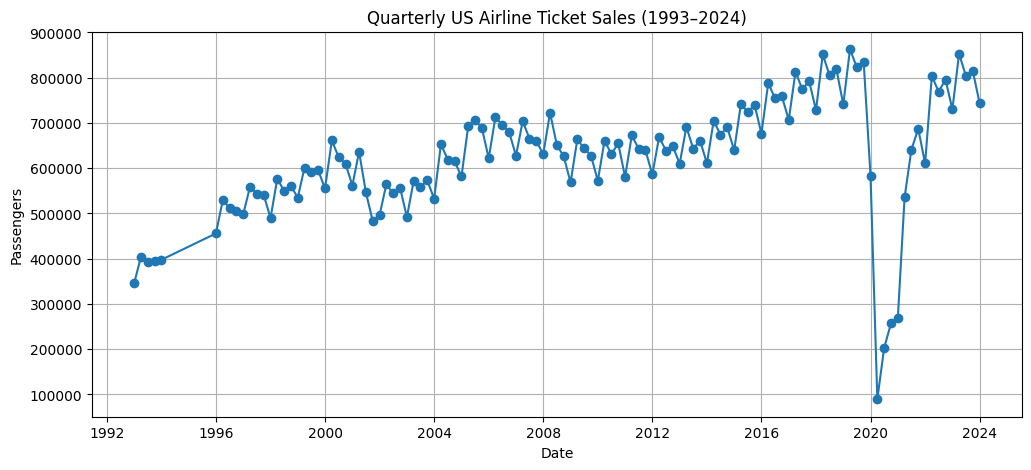

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(quarterly_df['Date'], quarterly_df['passengers'], marker='o')
plt.title('Quarterly US Airline Ticket Sales (1993–2024)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

TIME SERIES PREPARATION- STATIONARY CHECK

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Run Augmented Dickey-Fuller test
result = adfuller(quarterly_df['passengers'])

# Print results
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

if result[1] < 0.05:
    print("✅ Series is stationary")
else:
    print("❌ Series is not stationary — Differencing needed")

ADF Statistic: -3.3212888017595237
p-value: 0.01395327248651203
✅ Series is stationary


FIT ARIMA MODEL

In [ ]:
!pip install pmdarima

In [ ]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

# Fit auto ARIMA (no seasonality here, we’ll do SARIMA later)
model = auto_arima(
    quarterly_df['passengers'],
    start_p=0, start_q=0,
    max_p=5, max_q=5,
    d=0,  # already stationary
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=3491.305, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=3416.458, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=3014.512, Time=0.08 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2997.604, Time=0.13 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=0.05 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2998.602, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=2996.784, Time=0.15 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=3016.526, Time=0.08 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=2994.379, Time=0.39 sec
 ARIMA(4,0,2)(0,0,0)[0]             : AIC=2992.168, Time=0.36 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=2996.705, Time=0.29 sec
 ARIMA(5,0,2)(0,0,0)[0]             : AIC=2993.728, Time=1.85 sec
 ARIMA(4,0,3)(0,0,0)[0]             : AIC=2995.709, Time=1.18 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=2

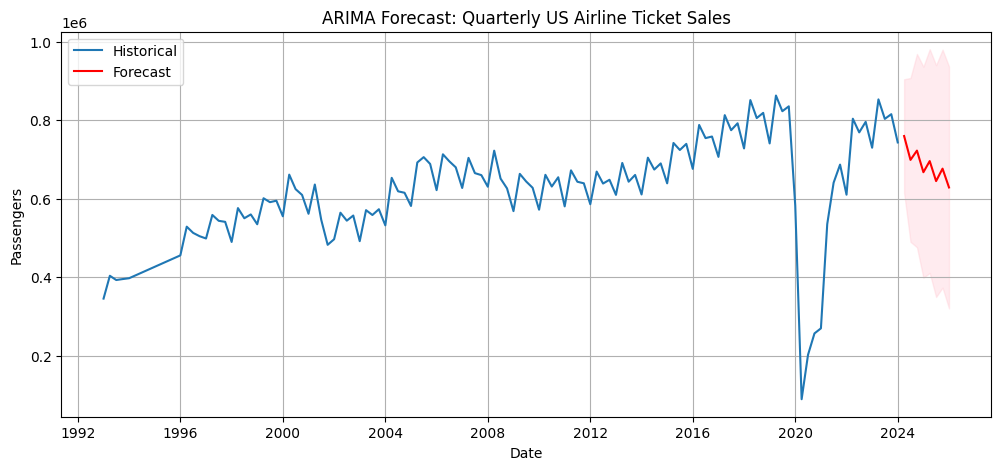

In [ ]:
# Forecast next 8 quarters (2 years)
n_periods = 8
forecast, conf_int = model.predict(n_periods=n_periods, return_conf_int=True)

# Create future dates
future_dates = pd.date_range(
    start=quarterly_df['Date'].max() + pd.offsets.QuarterBegin(),
    periods=n_periods, freq='QS'
)

# Plot
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.plot(quarterly_df['Date'], quarterly_df['passengers'], label='Historical')
plt.plot(future_dates, forecast, label='Forecast', color='red')
plt.fill_between(future_dates, conf_int[:,0], conf_int[:,1], color='pink', alpha=0.3)
plt.title("ARIMA Forecast: Quarterly US Airline Ticket Sales")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()

FIT SARIMA(SEASONAL ARIMA)

In [ ]:
!pip install statsmodels --upgrade


In [ ]:
import statsmodels.api as sm

# Define model
sarima_model = sm.tsa.SARIMAX(
    quarterly_df['passengers'],
    order=(1, 0, 1),        # Non-seasonal (p,d,q)
    seasonal_order=(1, 1, 1, 4),  # Seasonal (P,D,Q,s)
    enforce_stationarity=False,
    enforce_invertibility=False
)

# Fit model
sarima_result = sarima_model.fit()
print(sarima_result.summary())


                                     SARIMAX Results                                     
Dep. Variable:                        passengers   No. Observations:                  118
Model:             SARIMAX(1, 0, 1)x(1, 1, 1, 4)   Log Likelihood               -1369.786
Date:                           Tue, 29 Apr 2025   AIC                           2749.573
Time:                                   07:33:33   BIC                           2762.983
Sample:                                        0   HQIC                          2755.010
                                           - 118                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7816      0.090      8.642      0.000       0.604       0.959
ma.L1          0.2655      0.101      2.620

FORECAST WITH SARIMA

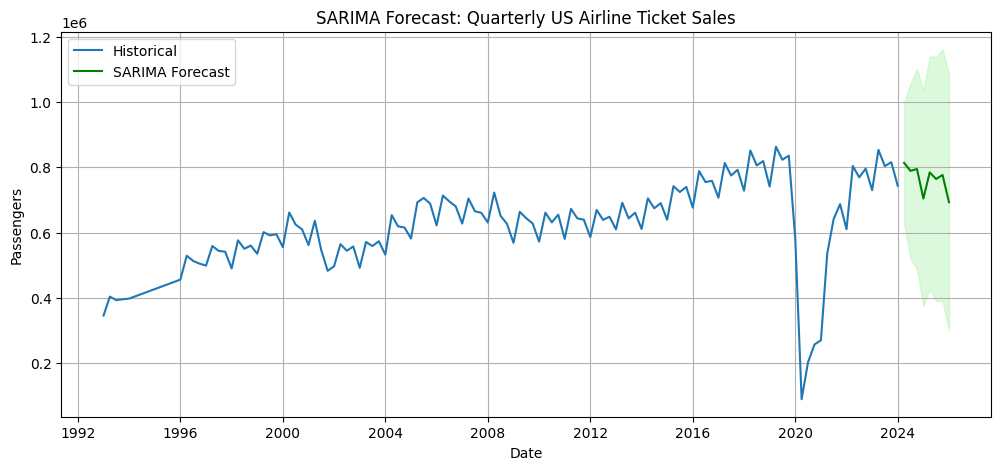

In [ ]:
# Forecast next 8 quarters
n_steps = 8
forecast = sarima_result.get_forecast(steps=n_steps)
conf_int = forecast.conf_int()

# Build future date range
future_dates = pd.date_range(
    start=quarterly_df['Date'].max() + pd.offsets.QuarterBegin(),
    periods=n_steps, freq='QS'
)

# Plot
plt.figure(figsize=(12,5))
plt.plot(quarterly_df['Date'], quarterly_df['passengers'], label='Historical')
plt.plot(future_dates, forecast.predicted_mean, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, conf_int.iloc[:,0], conf_int.iloc[:,1], color='lightgreen', alpha=0.3)
plt.title("SARIMA Forecast: Quarterly US Airline Ticket Sales")
plt.xlabel("Date")
plt.ylabel("Passengers")
plt.legend()
plt.grid()
plt.show()

VISUAL COMPARISON OF ARIMA AND SARIMA

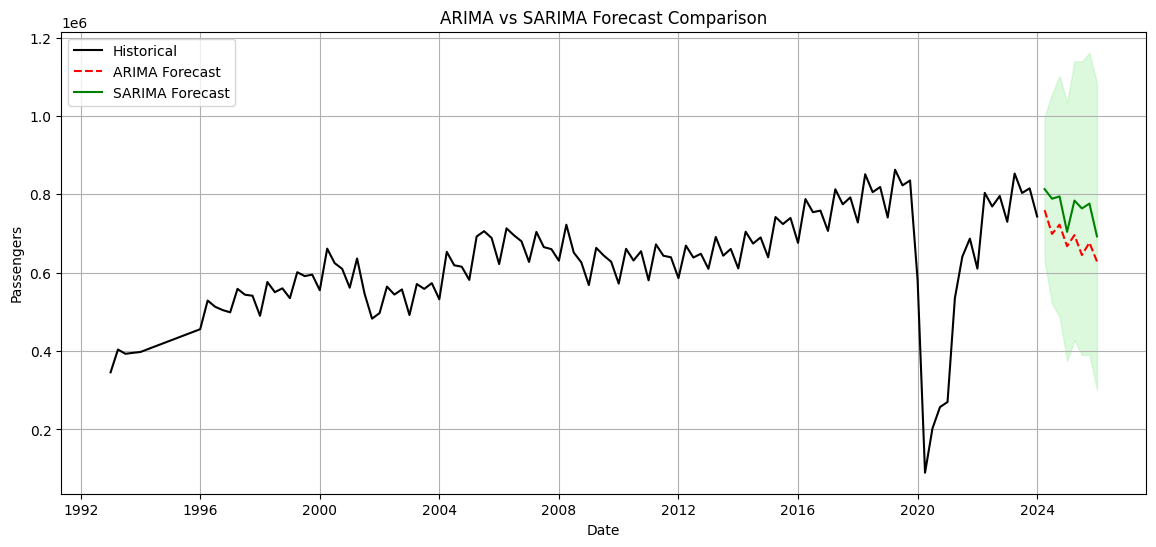

In [ ]:
# Forecast with ARIMA (already trained as `model`)
arima_forecast = model.predict(n_periods=8)

# Forecast with SARIMA (already trained as `sarima_result`)
sarima_forecast = sarima_result.get_forecast(steps=8)
sarima_pred = sarima_forecast.predicted_mean
sarima_conf = sarima_forecast.conf_int()

# Dates
future_dates = pd.date_range(
    start=quarterly_df['Date'].max() + pd.offsets.QuarterBegin(),
    periods=8, freq='QS'
)

# Plot Comparison
plt.figure(figsize=(14,6))
plt.plot(quarterly_df['Date'], quarterly_df['passengers'], label='Historical', color='black')

# ARIMA
plt.plot(future_dates, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--')

# SARIMA
plt.plot(future_dates, sarima_pred, label='SARIMA Forecast', color='green')
plt.fill_between(future_dates, sarima_conf.iloc[:, 0], sarima_conf.iloc[:, 1],
                 color='lightgreen', alpha=0.3)

plt.title('ARIMA vs SARIMA Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()


FORECAST WITH FACEBOOK PROPHET

In [ ]:
!pip install prophet

In [ ]:
from prophet import Prophet

In [ ]:
# Prepare DataFrame
prophet_df = quarterly_df[['Date', 'passengers']].rename(columns={'Date': 'ds', 'passengers': 'y'})

In [ ]:
# Initialize and fit
model = Prophet()
model.fit(prophet_df)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp917fo8yv/40oghecs.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp917fo8yv/68levxc7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94990', 'data', 'file=/tmp/tmp917fo8yv/40oghecs.json', 'init=/tmp/tmp917fo8yv/68levxc7.json', 'output', 'file=/tmp/tmp917fo8yv/prophet_model8nmidrru/prophet_model-20250429074123.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:41:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:41:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
# Create future dataframe
future = model.make_future_dataframe(periods=8, freq='Q')
forecast = model.predict(future)

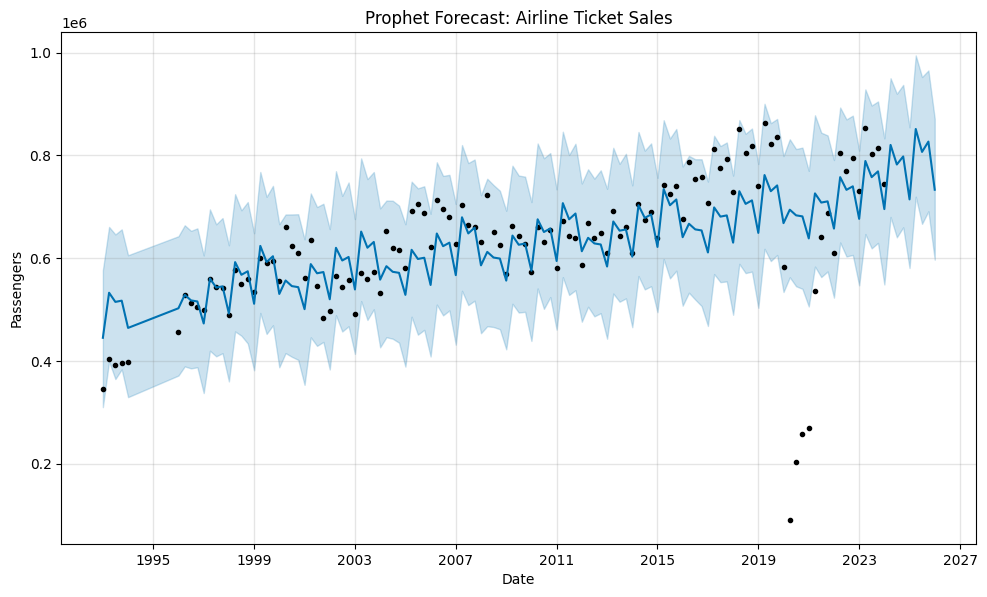

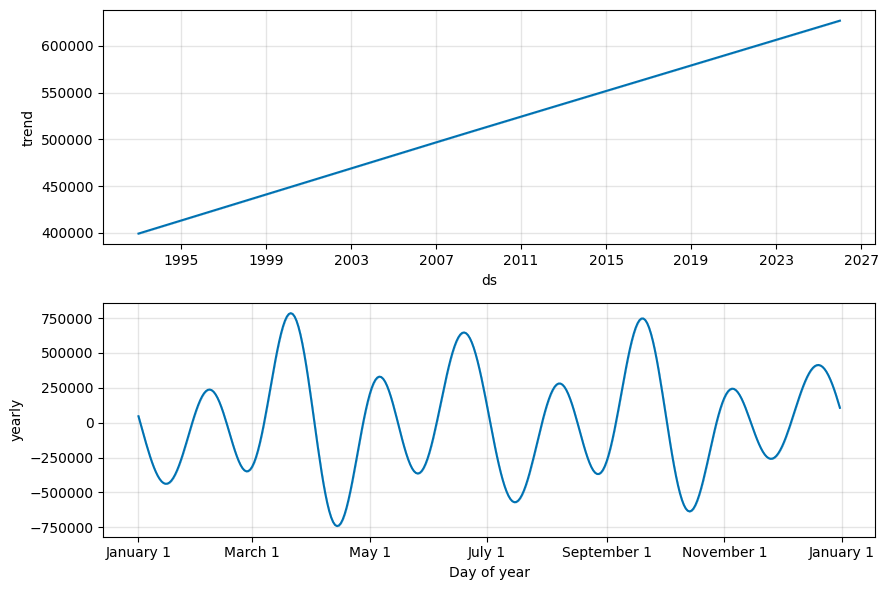

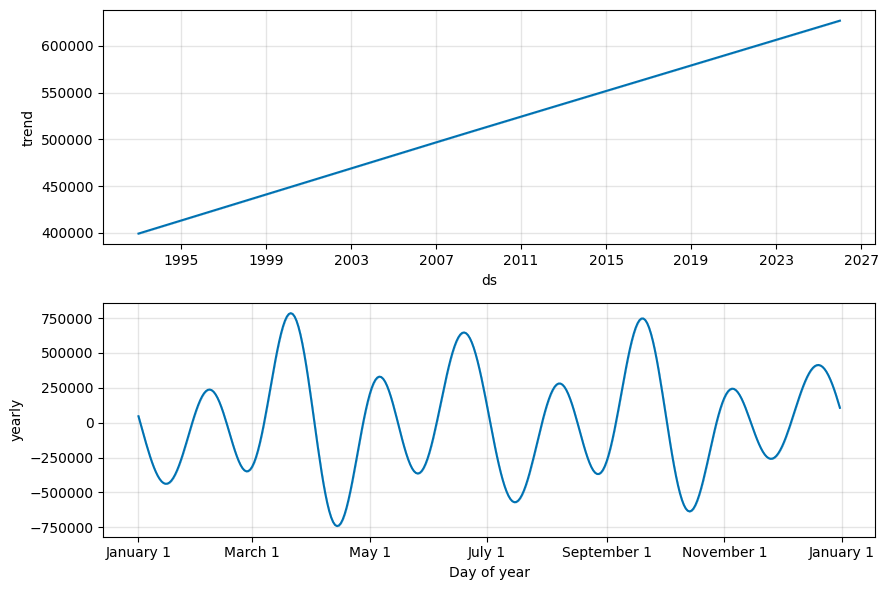

In [ ]:
# Forecast plot
model.plot(forecast)
plt.title('Prophet Forecast: Airline Ticket Sales')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.grid(True)
plt.show()

# Optional: Trend and seasonality components
model.plot_components(forecast)

FORECASTING WITH XgBOOST

In [ ]:
# Copy base DataFrame
df = df.copy()

# Create 'Date' column using Year and Quarter
df['QuarterStartMonth'] = df['quarter'].map({'Q1': 1, 'Q2': 4, 'Q3': 7, 'Q4': 10})
df['Date'] = pd.to_datetime(dict(year=df['Year'], month=df['QuarterStartMonth'], day=1))

# Sort and clean
df = df.sort_values('Date')
df.dropna(subset=['passengers'], inplace=True)

# Encode carrier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['CarrierEncoded'] = le.fit_transform(df['carrier_lg'])

# Select features
features = ['Year', 'QuarterStartMonth', 'fare', 'nsmiles', 'CarrierEncoded']
target = 'passengers'

In [ ]:
from sklearn.model_selection import train_test_split

# Sort by date
df = df.sort_values('Date')
X = df[features]
y = df[target]

# Last 8 rows as test (8 quarters)
X_train, X_test = X[:-8], X[-8:]
y_train, y_test = y[:-8], y[-8:]
dates_test = df['Date'][-8:]

Train XgBOOST Regressor

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

model = XGBRegressor(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'XGBoost RMSE: {rmse:.2f}, MAE: {mae:.2f}')

XGBoost RMSE: 151.36, MAE: 126.49


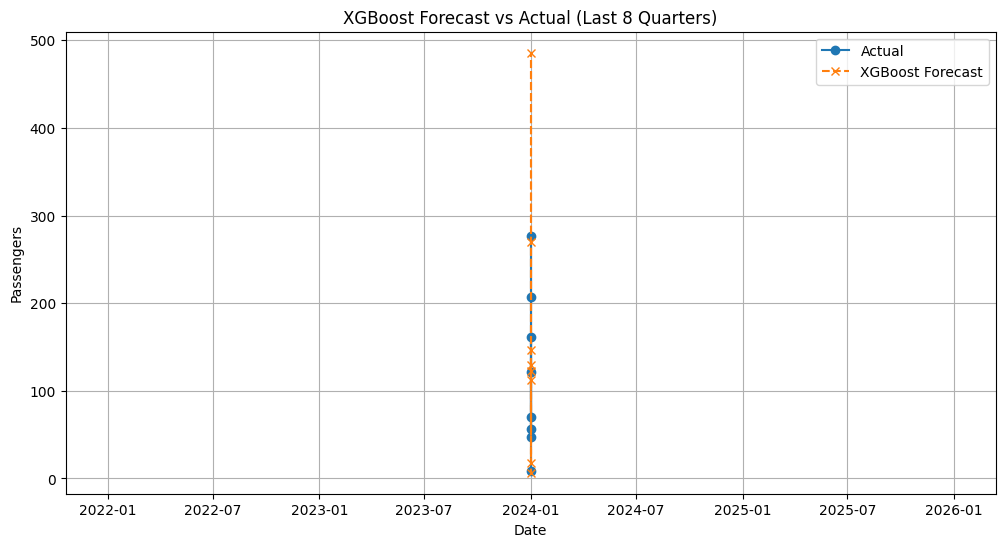

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(dates_test, y_test.values, label='Actual', marker='o')
plt.plot(dates_test, y_pred, label='XGBoost Forecast', marker='x', linestyle='--')
plt.title('XGBoost Forecast vs Actual (Last 8 Quarters)')
plt.xlabel('Date')
plt.ylabel('Passengers')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
from sklearn.metrics import mean_absolute_error
import numpy as np

# Number of periods to compare
n_periods = 8

# True values
y_full = df['passengers'].dropna()
y_test = y_full[-n_periods:].values

# Prophet predictions (assumes forecast_prophet has column 'yhat')
y_pred_prophet = forecast['yhat'][-n_periods:].values

# SARIMA forecast
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Train SARIMA on all data except the last 8
y_train_sarima = y_full[:-n_periods]
sarima_model = SARIMAX(y_train_sarima, order=(1,1,1), seasonal_order=(1,1,1,4))  # adjust as per your model
sarima_result = sarima_model.fit(disp=False)
y_pred_sarima = sarima_result.get_forecast(steps=n_periods).predicted_mean.values

# Calculate MAE
mae_prophet = mean_absolute_error(y_test, y_pred_prophet)
mae_sarima = mean_absolute_error(y_test, y_pred_sarima)

# Output results
print("=== MAE Comparison ===")
print(f"Prophet MAE: {mae_prophet:.2f}")
print(f"SARIMA  MAE: {mae_sarima:.2f}")

if mae_prophet < mae_sarima:
    print("\nConclusion: Prophet has better forecast accuracy (lower MAE).")
else:
    print("\nConclusion: SARIMA has better forecast accuracy (lower MAE).")


=== MAE Comparison ===
Prophet MAE: 791603.76
SARIMA  MAE: 10660432.92

Conclusion: Prophet has better forecast accuracy (lower MAE).
